# Main task -> Predict price of Toyota Corolla

## Importing libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [248]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## EDA

In [251]:
df.shape

(1436, 11)

In [253]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [255]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [257]:
df.duplicated().sum()

1

In [259]:
df.drop_duplicates(inplace=True)

In [261]:
df.duplicated().sum()

0

In [263]:
df.shape

(1435, 11)

In [265]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

In [267]:
df2 = pd.get_dummies(df,['Fuel_Type'],dtype=int)
df2

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [269]:
df2.Cylinders.nunique()

1

In [271]:
df2.Doors.nunique()

4

In [273]:
# As number of doors do not significantly affect pricing and only 1 unique value of 'Cylinders' -> Drop these columns

In [275]:
df2.drop(columns=['Doors','Cylinders'],inplace=True)
df2

,Price,Age_08_04,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,5,1165,0,1,0
1,13750,23,72937,90,0,2000,5,1165,0,1,0
2,13950,24,41711,90,0,2000,5,1165,0,1,0
3,14950,26,48000,90,0,2000,5,1165,0,1,0
4,13750,30,38500,90,0,2000,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,5,1015,0,0,1


## Data Visualization

<Axes: >

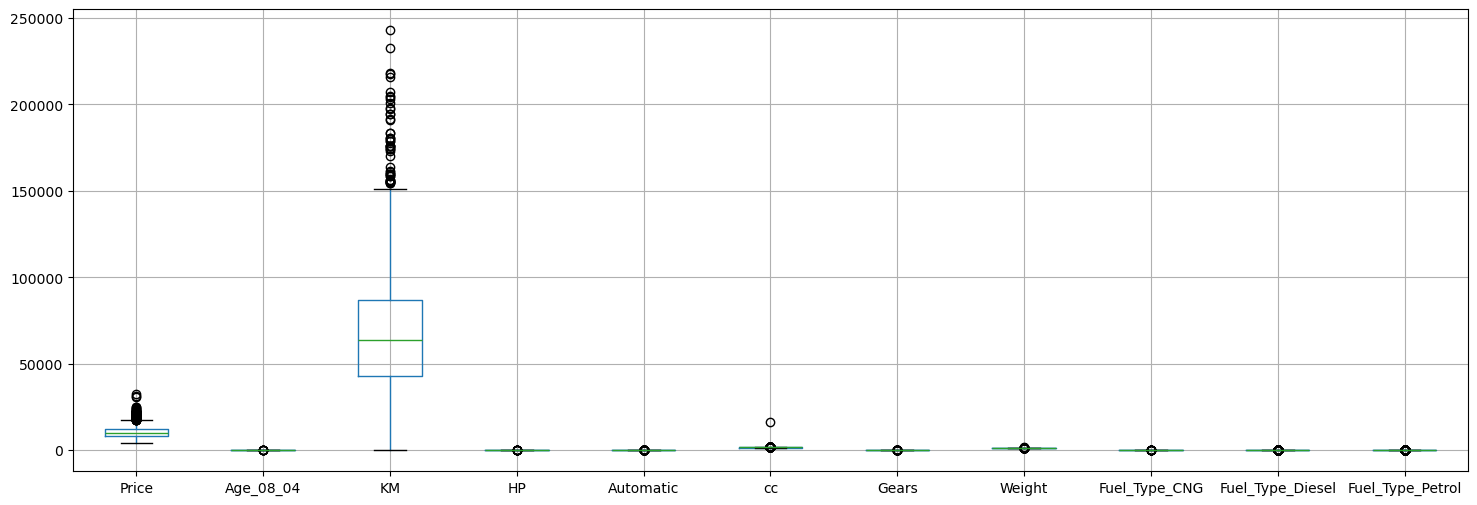

In [278]:
df2.boxplot(figsize=(18,6))

In [280]:
# Features -> 'Price','KM','CC' have a positively skewed data as the outliers are above the upper whisker in these boxplots. 
# Positively skewed data has a longer tail on the right side of the distribution, meaning there are more extreme values on the higher end 
# and thus more outliers above the upper whisker. 

In [282]:
def outlier_detection(df2,columns): #Use this technique 'iqr' when data has extreme outliers 
    for col in columns:
        Q1=df2[col].quantile(0.25)
        Q3=df2[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df2[col]=np.where(df2[col]>upper,upper,np.where(df2[col]<lower,lower,df2[col]))
    return df2

In [284]:
outlier_detection(df2,['KM','Price','cc'])

,Price,Age_08_04,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23,46986.0,90,0,1900.0,5,1165,0,1,0
1,13750.0,23,72937.0,90,0,1900.0,5,1165,0,1,0
2,13950.0,24,41711.0,90,0,1900.0,5,1165,0,1,0
3,14950.0,26,48000.0,90,0,1900.0,5,1165,0,1,0
4,13750.0,30,38500.0,90,0,1900.0,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69,20544.0,86,0,1300.0,5,1025,0,0,1
1432,10845.0,72,19000.0,86,0,1300.0,5,1015,0,0,1
1433,8500.0,71,17016.0,86,0,1300.0,5,1015,0,0,1
1434,7250.0,70,16916.0,86,0,1300.0,5,1015,0,0,1


<Axes: >

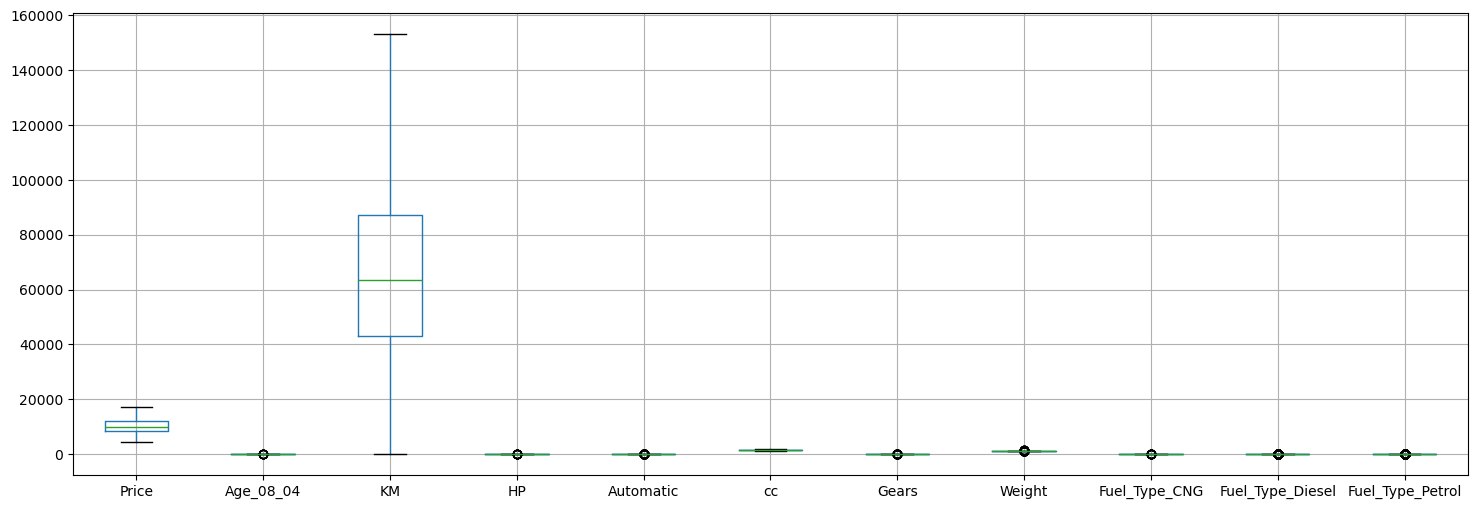

In [286]:
df2.boxplot(figsize=(18,6))

In [288]:
# This custom function is designed to detect and handle outliers in a pandas DataFrame for a specified list of columns. It employs 
# the Interquartile Range (IQR) method for outlier detection and replaces outliers with either the upper or lower bounds calculated based on the IQR.

<Axes: xlabel='Price', ylabel='Age_08_04'>

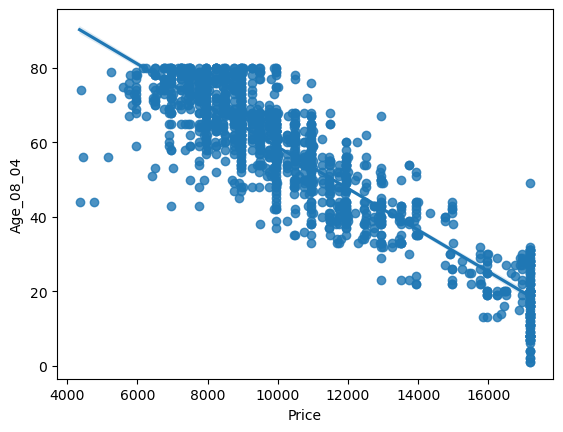

In [290]:
sns.regplot(x='Price',y='Age_08_04',data=df2)

In [292]:
# This plot shows negative linear correlation between Age and Price of Corolla

<Axes: xlabel='Price', ylabel='KM'>

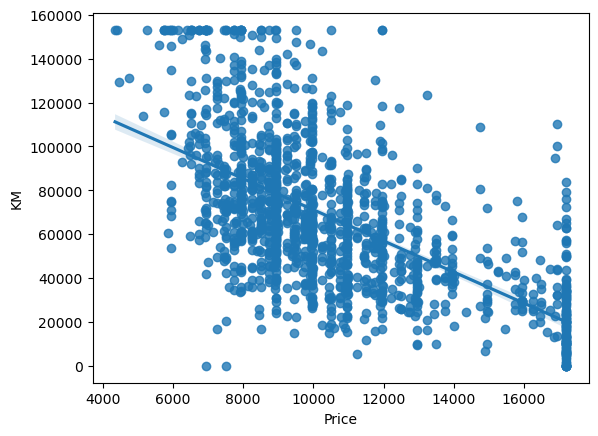

In [294]:
sns.regplot(x='Price',y='KM',data=df2)

In [296]:
# This plot shows negative linear correlation between KMs driven and Price of Corolla

<Axes: xlabel='Price', ylabel='HP'>

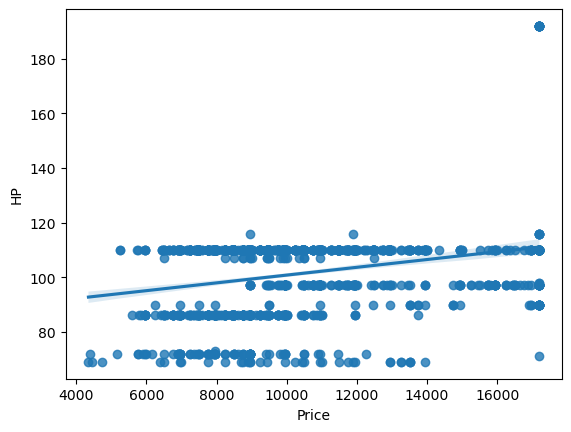

In [298]:
sns.regplot(x='Price',y='HP',data=df2)

In [300]:
# This shows a slightly positive linear correlation between 'HP' and 'Price', stating as HP increases price increases. 

<Axes: xlabel='Price', ylabel='cc'>

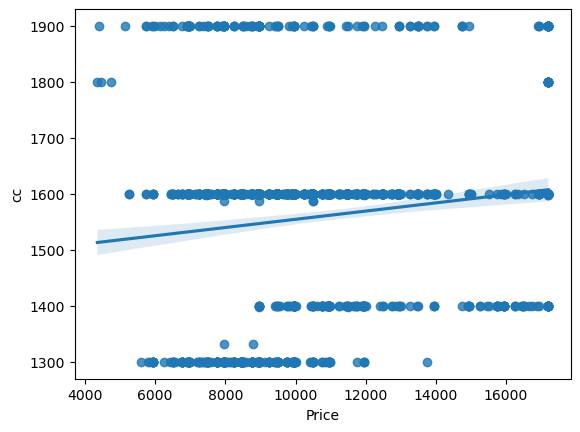

In [302]:
sns.regplot(x='Price',y='cc',data=df2)

<Axes: xlabel='Price', ylabel='Automatic'>

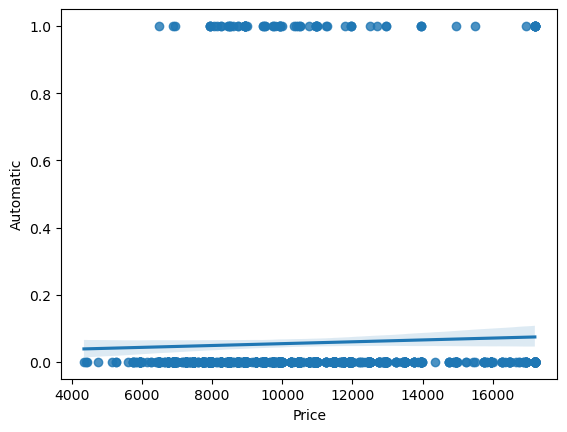

In [304]:
sns.regplot(x='Price',y='Automatic',data=df2)

<Axes: xlabel='Price', ylabel='Gears'>

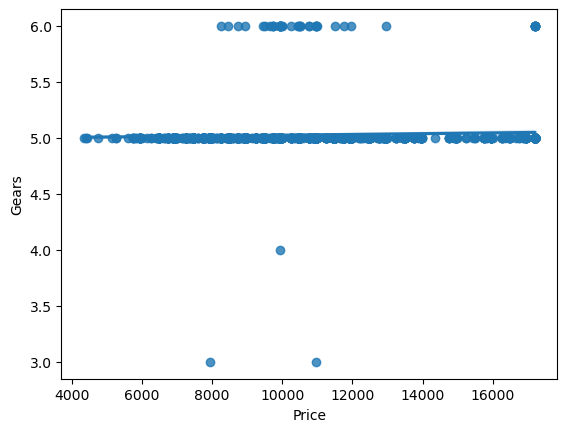

In [306]:
sns.regplot(x='Price',y='Gears',data=df2)

<Axes: xlabel='Price', ylabel='Weight'>

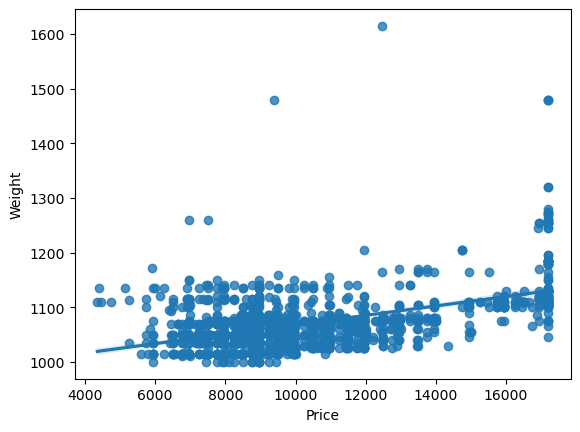

In [308]:
sns.regplot(x='Price',y='Weight',data=df2)

In [310]:
# This plot shows a slightly positive linear correlation between weight of car and price. 

In [313]:
## We can see that features like 'Automatic','Gears','cc' and 'Fuel type' have no significant effect on Price (Target Variable), 
# thus we will drop these columns for further analysis. 

In [315]:
df2.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23,46986.0,90,0,1900.0,5,1165,0,1,0
1,13750.0,23,72937.0,90,0,1900.0,5,1165,0,1,0
2,13950.0,24,41711.0,90,0,1900.0,5,1165,0,1,0
3,14950.0,26,48000.0,90,0,1900.0,5,1165,0,1,0
4,13750.0,30,38500.0,90,0,1900.0,5,1170,0,1,0


In [317]:
df2.drop(columns=['Automatic','cc','Gears','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'],inplace=True)

In [319]:
df2

,Price,Age_08_04,KM,HP,Weight
0,13500.0,23,46986.0,90,1165
1,13750.0,23,72937.0,90,1165
2,13950.0,24,41711.0,90,1165
3,14950.0,26,48000.0,90,1165
4,13750.0,30,38500.0,90,1170
...,...,...,...,...,...
1431,7500.0,69,20544.0,86,1025
1432,10845.0,72,19000.0,86,1015
1433,8500.0,71,17016.0,86,1015
1434,7250.0,70,16916.0,86,1015


## Model Building

In [322]:
import statsmodels.formula.api as sfa
from statsmodels.graphics.regressionplots import influence_plot

#### Model 1

In [324]:
model = sfa.ols('Price~Age_08_04+KM+HP+Weight',df2).fit()

In [326]:
model.params

Intercept    7342.486374
Age_08_04    -114.174030
KM             -0.016451
HP             19.849934
Weight          8.060550
dtype: float64

In [338]:
### INTERPRETATION: 

# Intercept (or Constant) = 7342 means that when all the independent variables in your model are zero, the model predicts a value of 7342
# for the dependent variable.

# Age: This means that as the value of the independent variable (Age) increases by one unit, the dependent variable (Price) is predicted 
# to decrease by 114.174 units, holding all other variables constant.

# KM: This means that as the value of the independent variable (KM) increases by one unit, the dependent variable (Price) is predicted 
# to decrease by 0.016 units, holding all other variables constant.

# HP: This means that as the value of the independent variable (HP) increases by one unit, the dependent variable (Price) is predicted 
# to increase by 19.849 units, holding all other variables constant.

# Weight: This means that as the value of the independent variable (Weight) increases by one unit, the dependent variable (Price) is predicted 
# to increase by 8.060 units, holding all other variables constant.

In [328]:
model.pvalues

Intercept     1.360053e-19
Age_08_04    1.634764e-319
KM            1.132128e-45
HP            7.411759e-20
Weight        1.272444e-30
dtype: float64

In [330]:
# We can substantiate that all independent features have high significance level from p-values data

In [334]:
model.rsquared.round(2)

0.85

In [336]:
# R-squared value of 0.85 suggests that the model is able to predict or explain 85% of the variation in the dependent variable. 
# The remaining 15% is attributed to factors that are not included in the model or random error.

#### Model 2

In [342]:
model2 = sfa.ols('Price~Age_08_04+KM',df2).fit()

In [346]:
model2.params

Intercept    18724.739024
Age_08_04     -127.851229
KM              -0.015842
dtype: float64

In [ ]:
### INTERPRETATION: 

# Intercept (or Constant) = 18724.739 means that when all the independent variables in your model are zero, the model predicts a value of 18724.739
# for the dependent variable.

# Age: This means that as the value of the independent variable (Age) increases by one unit, the dependent variable (Price) is predicted 
# to decrease by 127.851 units, holding all other variables constant.

# KM: This means that as the value of the independent variable (KM) increases by one unit, the dependent variable (Price) is predicted 
# to decrease by 0.0158 units, holding all other variables constant

In [350]:
model2.rsquared.round(2)

0.83

In [352]:
# R-squared value of 0.83 suggests that the model is able to predict or explain 83% of the variation in the dependent variable. 
# The remaining 17% is attributed to factors that are not included in the model or random error.

#### Model 3

In [355]:
model3 = sfa.ols('Price~Age_08_04+HP+Weight',df2).fit()

In [357]:
model3.params

Intercept    9407.267891
Age_08_04    -133.097863
HP             29.093347
Weight          5.210207
dtype: float64

In [365]:
### INTERPRETATION: 

# Intercept (or Constant) = 9407.267 means that when all the independent variables in your model are zero, the model predicts a value of 9407.267
# for the dependent variable.

# Age: This means that as the value of the independent variable (Age) increases by one unit, the dependent variable (Price) is predicted 
# to decrease by 133.097 units, holding all other variables constant.

# HP: This means that as the value of the independent variable (HP) increases by one unit, the dependent variable (Price) is predicted 
# to increase by 29.093 units, holding all other variables constant.

# Weight: This means that as the value of the independent variable (Weight) increases by one unit, the dependent variable (Price) is predicted 
# to increase by 5.210 units, holding all other variables constant.

In [361]:
model3.rsquared.round(2)

0.83

In [363]:
# R-squared value of 0.83 suggests that the model is able to predict or explain 83% of the variation in the dependent variable. 
# The remaining 17% is attributed to factors that are not included in the model or random error.

In [367]:
### CONCLUSION: 

# On basis of r-squared value, we select 'Model 1' which gives the highest r-squared value of 0.85.

## Model Evaluation

#### 1. Residual Plot -> Identify non-linearity,heteroscedasticity and outliers

In [379]:
df2.head()

,Price,Age_08_04,KM,HP,Weight
0,13500.0,23,46986.0,90,1165
1,13750.0,23,72937.0,90,1165
2,13950.0,24,41711.0,90,1165
3,14950.0,26,48000.0,90,1165
4,13750.0,30,38500.0,90,1170


In [371]:
# Using Model 1 from above

In [375]:
#Predict values for 'Price'
model.fittedvalues

0       15120.540055
1       14693.613477
2       15093.146407
3       14761.336390
4       14501.229966
            ...     
1431     9095.662049
1432     8697.935198
1433     8844.748522
1434     8960.567678
1435     9828.189414
Length: 1435, dtype: float64

In [381]:
model.resid # model.resid = (model.fittedvalues - df2 Price values)

0      -1620.540055
1       -943.613477
2      -1143.146407
3        188.663610
4       -751.229966
           ...     
1431   -1595.662049
1432    2147.064802
1433    -344.748522
1434   -1710.567678
1435   -2878.189414
Length: 1435, dtype: float64

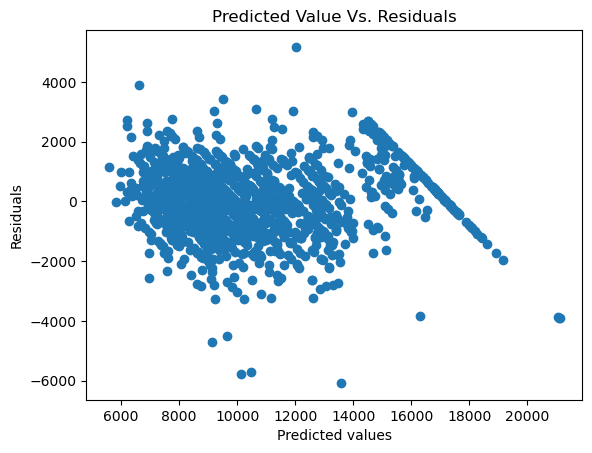

In [385]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Value Vs. Residuals')
plt.show()

In [323]:
# From the above residual plot we can concur: 

# 1. Randomness: The residuals are randomly scattered around the horizontal axis (zero line) with no discernible pattern. This indicates that 
#    the model is capturing the underlying relationship between the variables well.

# 2. Constant Variance (Homoscedasticity): The spread of the residuals are roughly constant across the range of predicted values or the 
#    independent variable. This indicates that the model's assumptions about the variance of the errors are significantly met.

# 3. Also, we don't see any U-shaped curve or funnel shaped pattern in the data (U-shaped or funnel shaped pattern indicates non-linearity)

# CONCLUSION: 
## On basis of Residual plot we can say that our model ('Model 1') is a good fit. 

### 2. QQ plot (Best fitted values) -> Check for normality

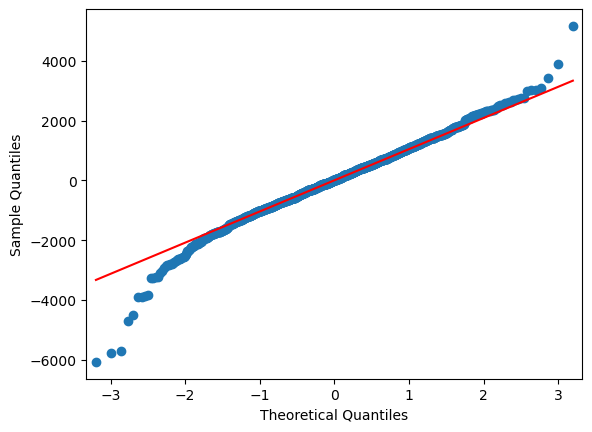

In [398]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q');

In [325]:
# From above QQ plot we can concur that our model('Model 1') is a good fit as we can see in the QQ plot that approximately all the points
# fall on a straight diagonal line which indicates a good Multi-Linear regression model. 

## Lasso-Ridge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [154]:
corolla_data=pd.read_csv('ToyotaCorolla - MLR.csv')
corolla_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [158]:
corolla_data.drop_duplicates(inplace=True)
corolla_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [160]:
corolla_data.drop(columns=['Fuel_Type','Automatic','cc','Doors','Cylinders','Gears'],inplace=True)
corolla_data

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1431,7500,69,20544,86,1025
1432,10845,72,19000,86,1015
1433,8500,71,17016,86,1015
1434,7250,70,16916,86,1015


In [162]:
X = corolla_data.drop('Price',axis=1) #I/P
Y = corolla_data[['Price']] #O/P

In [164]:
X

,Age_08_04,KM,HP,Weight
0,23,46986,90,1165
1,23,72937,90,1165
2,24,41711,90,1165
3,26,48000,90,1165
4,30,38500,90,1170
...,...,...,...,...
1431,69,20544,86,1025
1432,72,19000,86,1015
1433,71,17016,86,1015
1434,70,16916,86,1015


In [166]:
Y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [220]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [222]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(corolla_data)
x

array([[ 0.77036821, -1.77726827, -0.57595832, -0.76735061,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, -0.76735061,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, -0.76735061,  1.77496405],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, -1.03444129, -1.09674669],
       [-0.96214536,  0.75549016, -1.37829506, -1.03444129, -1.09674669],
       [-1.04530601,  1.07882103, -1.82962616,  0.56810282,  0.7985824 ]])

In [224]:
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 4), (1148, 1), (287, 4), (287, 1))

In [288]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=1.0)  # Initialize with a regularization strength (alpha)
ridge_model = Ridge(alpha=1.0) 
lasso_model.fit(x_train, y_train)

Lasso()

In [290]:
ridge_model.fit(x_train, y_train)

Ridge()

In [292]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}  # Example values for alpha
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5)  # 5-fold cross-validation
lasso_grid.fit(x_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso_alpha

10.0

In [298]:
from sklearn.metrics import mean_squared_error, r2_score
lasso_pred = lasso_grid.predict(x_test)  # Predictions from the best Lasso model

In [300]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)
print(mse_lasso)
print(r2_lasso)

1581732.638814294
0.8480339966063116


In [302]:
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5)  # 5-fold cross-validation
ridge_grid.fit(x_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_alpha

10.0

In [304]:
ridge_pred = ridge_grid.predict(x_test)

In [306]:
mse_ridge = mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)
print(mse_ridge)
print(r2_ridge)

1582083.2277198904
0.8480003135466654


In [308]:
# An R2 score of 0.8480 in both Lasso & Ridge models indicates that 84.80% of the variance in the dependent variable is explained by 
# the independent variables in the models.

# We can concur that both models are doing a good job of capturing the relationship between the features and the target variable.

# Lasso model appears to be performing slightly better than Ridge Model based on Mean Square Error values. 
# The difference in MSE is relatively small, but it suggests that Lasso model is making predictions that are closer to the true values. 

In [329]:
# Both Lasso and Ridge aim to minimize the MSE while constraining the size of the coefficients.

# By adding a penalty term to the loss function, Lasso and Ridge find a balance between model complexity 
# (number of features, size of coefficients) and goodness of fit (MSE).

# A larger penalty in either Lasso or Ridge results in smaller coefficients. Often, this will also increase MSE on the training data 
# since we are restricting the model's prediction power.

## Interview Questions

#### Q1. What is Normalization and Standardization and how is it helpful?

In [319]:
# Normalization refers to rescaling the values of a feature to a specific range, usually between 0 and 1.
# Normalization is helpful when the data has different scales for different features, and you want to bring them to a similar range.

# Standardization transforms data to have zero mean and unit variance.
# Standardization is helpful when you want to center your data around zero and scale it to have unit variance.

# Standardization is more widely applicable, as it is less sensitive to outliers.
# Normalization might be a better choice if you need your data to be within a specific range (e.g., 0 to 1)

#### Q2. What techniques can be used to address multicollinearity in multiple linear regression?

In [321]:
# Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can cause problems because 
# it becomes difficult to isolate the individual effects of each variable on the dependent variable.

# Techniques to Address Multicollinearity: - 

# 1. Feature Selection:

# Remove one or more of the highly correlated variables. This is the simplest approach, but it can lead to loss of information 
# if the removed variables are actually important predictors.

# 2. Feature Engineering:

# Combine correlated variables into a single variable. For example, create a new variable that is the average of two highly correlated variables.
# Use PCA to reduce the dimensionality of your data. PCA creates new uncorrelated variables (principal components) 
# that capture most of the variance in the original data.

# 3. Regularization:

# Use Ridge regression or Lasso regression. These techniques add a penalty term to the regression equation that shrinks the coefficients of 
# correlated variables, reducing their influence on the model.
# Ridge regression shrinks coefficients towards zero but doesn't set them to exactly zero.
# Lasso regression can shrink some coefficients to exactly zero, performing feature selection.